# Section 3.3

In [3]:
%run preamble.py
danish = pd.read_csv("../Data/danish.csv").x.values

# MLE of composite models

In [4]:
parms, BIC, AIC = mle_composite(danish, (1,1,1), "gam-par")
fit_gam_par = pd.DataFrame(np.append(parms, [AIC, BIC])).T
fit_gam_par.columns = ["shape", "tail", "thres", "AIC","BIC"]
print(fit_gam_par)
parms, BIC, AIC = mle_composite(danish, (1,1,1), "wei-par")
fit_wei_par = pd.DataFrame(np.append(parms, [AIC, BIC])).T
fit_wei_par.columns = ["shape", "tail", "thres", "AIC","BIC"]
print(fit_wei_par)
parms, BIC, AIC = mle_composite(danish, (0.5,1,1), "lnorm-par")
fit_lnorm_par = pd.DataFrame(np.append(parms, [AIC, BIC])).T
fit_lnorm_par.columns = ["shape", "tail", "thres", "AIC","BIC"]
print(fit_lnorm_par)

       shape      tail     thres          AIC          BIC
0  35.667524  1.313008  1.155924  7723.681796  7741.144319
       shape      tail     thres         AIC          BIC
0  14.033784  1.261477  1.002991  7686.75154  7704.214063
      shape      tail    thres          AIC          BIC
0  0.196517  1.328223  1.20743  7737.728264  7755.190787


# Bayesian inference and model comparison using SMC

In [6]:
np.random.seed(333)
model_prior, a, b = "gamma", 0.1*np.array([1,1,1]), 0.1*np.array([1, 1, 1])
popSize, verbose, smc_method, paralell, nproc = 1000, True, "likelihood_anealing", True, 20
loss_models = ['lnorm-par', "wei-par", "gam-par"]
%time traces_like, res_df_like = fit_composite_models_smc(danish,loss_models, model_prior, a, b, popSize, verbose, smc_method, paralell, nproc)


Fitting lnorm-par model
Fitting wei-par model
Fitting gam-par model
CPU times: user 1min 13s, sys: 2.36 s, total: 1min 16s
Wall time: 1min 22s


In [8]:
np.random.seed(333)
model_prior, a, b = "gamma", np.array([0.1,0.1,0.1]), np.array([0.1, 0.1, 0.1])
popSize, verbose, smc_method, paralell, nproc = 1000, True, "data_by_batch", True, 20
loss_models = ['lnorm-par', "wei-par", "gam-par"]
%time traces_data, res_df_data = fit_composite_models_smc(danish,loss_models, model_prior, a, b, popSize, verbose, smc_method, paralell, nproc)


Fitting lnorm-par model
Fitting wei-par model


/home/pgoffard/miniconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting gam-par model


/home/pgoffard/miniconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: user 10min 10s, sys: 12 s, total: 10min 22s
Wall time: 16min 39s


## Fitting the gamma-Pareto model

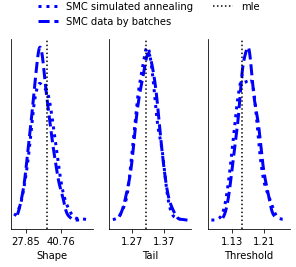

In [9]:
np.random.seed(333)
fig, axs = plt.subplots(1, 3, figsize=(5, 3.5))
loss_model = "gam-par"
parms_names = ['shape', 'tail', 'thres' ]
x_labs = ['Shape', 'Tail', 'Threshold']
for k in range(3):
#     positions = np.linspace(min(trace_gibbs_gam_par[parms_names[k]]), max(trace_gibbs_gam_par[parms_names[k]]), 1000)
#     kernel = st.gaussian_kde(trace_gibbs_gam_par[parms_names[k]])
#     axs[k].plot(positions, kernel(positions), lw=3, label = "Gibbs", color = "blue")
    positions = np.linspace(min(traces_like[loss_model][parms_names[k]].values), 
                            max(traces_like[loss_model][parms_names[k]].values), 1000)
    kernel = st.gaussian_kde(traces_like[loss_model][parms_names[k]].values)
    axs[k].plot(positions, kernel(positions), lw=3, label = "SMC simulated annealing", 
                color = "blue", linestyle = "dotted")
    positions = np.linspace(min(traces_data[loss_model][parms_names[k]].values), 
                            max(traces_data[loss_model][parms_names[k]].values), 1000)
    kernel = st.gaussian_kde(traces_data[loss_model][parms_names[k]].values)
    axs[k].plot(positions, kernel(positions), lw=3, label = "SMC data by batches", 
                color = "blue", linestyle = "dashed")

    axs[k].axvline(fit_gam_par[parms_names[k]].values, color = "black", linestyle = "dotted", label = "mle")
    axs[k].set_yticks([])
    axs[k].set_xlabel(x_labs[k])
    axs[k].set_xticks(np.round(
        traces_like[loss_model][parms_names[k]].quantile([0.05, 0.95]).values, 2))

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol = 2, borderaxespad=-0.2, loc='upper center', 
           frameon=False)
# fig.tight_layout()
sns.despine()

plt.savefig("../Figures/smc_posterior_danish_gamma_par_en.pdf")

## Fitting the Weibull-Pareto model

[35.66752418]


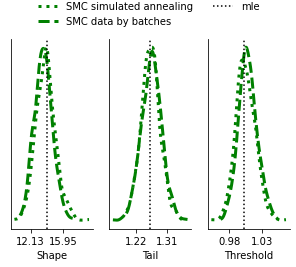

In [10]:
np.random.seed(333)
fig, axs = plt.subplots(1, 3, figsize=(5, 3.5))
loss_model = "wei-par"
for k in range(3):
#     positions = np.linspace(min(trace_gibbs_wei_par[parms_names[k]]), max(trace_gibbs_wei_par[parms_names[k]]), 1000)
#     kernel = st.gaussian_kde(trace_gibbs_wei_par[parms_names[k]])
#     axs[k].plot(positions, kernel(positions), lw=3, label = "Gibbs", color = "green")
    positions = np.linspace(min(traces_like[loss_model][parms_names[k]].values), 
                            max(traces_like[loss_model][parms_names[k]].values), 1000)
    kernel = st.gaussian_kde(traces_like[loss_model][parms_names[k]].values)
    axs[k].plot(positions, kernel(positions), lw=3, label = "SMC simulated annealing", 
                color = "green", linestyle = "dotted")
    positions = np.linspace(min(traces_data[loss_model][parms_names[k]].values), 
                            max(traces_data[loss_model][parms_names[k]].values), 1000)
    kernel = st.gaussian_kde(traces_data[loss_model][parms_names[k]].values)
    axs[k].plot(positions, kernel(positions), lw=3, label = "SMC data by batches", 
                color = "green", linestyle = "dashed")

    axs[k].axvline(fit_wei_par[parms_names[k]].values, color = "black", linestyle = "dotted", label = "mle")
    axs[k].set_yticks([])
    axs[k].set_xlabel(x_labs[k])
    axs[k].set_xticks(np.round(
        traces_like[loss_model][parms_names[k]].quantile([0.05, 0.95]).values, 2))

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol = 2, borderaxespad=-0.2, loc='upper center', 
           frameon=False)
sns.despine()
print(fit_gam_par[parms_names[0]].values)
plt.savefig("../Figures/smc_posterior_danish_weibull_par_en.pdf")

## Fitting the lognormal-Pareto model

[35.66752418]


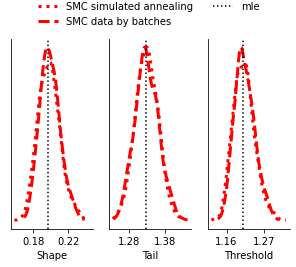

In [11]:
np.random.seed(333)
fig, axs = plt.subplots(1, 3, figsize=(5, 3.5))
loss_model = "lnorm-par"
for k in range(3):
#     positions = np.linspace(min(trace_gibbs_lnorm_par[parms_names[k]]), max(trace_gibbs_lnorm_par[parms_names[k]]), 1000)
#     kernel = st.gaussian_kde(trace_gibbs_lnorm_par[parms_names[k]])
#     axs[k].plot(positions, kernel(positions), lw=3, label = "Gibbs", color = "red")
    positions = np.linspace(min(traces_like[loss_model][parms_names[k]].values), 
                            max(traces_like[loss_model][parms_names[k]].values), 1000)
    kernel = st.gaussian_kde(traces_like[loss_model][parms_names[k]].values)
    axs[k].plot(positions, kernel(positions), lw=3, label = "SMC simulated annealing", 
                color = "red", linestyle = "dotted")
    positions = np.linspace(min(traces_data[loss_model][parms_names[k]].values), 
                            max(traces_data[loss_model][parms_names[k]].values), 1000)
    kernel = st.gaussian_kde(traces_data[loss_model][parms_names[k]].values)
    axs[k].plot(positions, kernel(positions), lw=3, label = "SMC data by batches", 
                color = "red", linestyle = "dashed")

    axs[k].axvline(fit_lnorm_par[parms_names[k]].values, color = "black", linestyle = "dotted", label = "mle")
    axs[k].set_yticks([])
    axs[k].set_xlabel(x_labs[k])
    axs[k].set_xticks(np.round(
        traces_like[loss_model][parms_names[k]].quantile([0.05, 0.95]).values, 2))

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol = 2, borderaxespad=-0.2, loc='upper center', 
           frameon=False)
sns.despine()
print(fit_gam_par[parms_names[0]].values)
plt.savefig("../Figures/smc_posterior_danish_lnorm_par_en.pdf")

In [12]:
print(res_df_data.to_latex(index = False,float_format="%.2f", columns = ["loss_model","log_marg","model_evidence",  "DIC", "WAIC"]))
res_df_data

\begin{tabular}{lrrrr}
\toprule
loss\_model &  log\_marg &  model\_evidence &     DIC &    WAIC \\
\midrule
 lnorm-par &  -3881.87 &            0.00 & 7725.54 & 7744.58 \\
   wei-par &  -3857.10 &            1.00 & 7674.33 & 7689.73 \\
   gam-par &  -3877.91 &            0.00 & 7711.89 & 7729.27 \\
\bottomrule
\end{tabular}



,loss_model,log_marg,DIC,WAIC,shape,tail,thres,model_evidence
0,lnorm-par,-3881.867827,7725.537182,7744.577845,0.199127,1.330226,1.214109,1.752940e-11
0,wei-par,-3857.100685,7674.334828,7689.728784,13.628406,1.264802,1.008845,1.000000e+00
0,gam-par,-3877.908751,7711.888644,7729.269050,33.505568,1.319052,1.170828,9.186955e-10


In [13]:
print(res_df_like.to_latex(index = False, float_format="%.2f", columns = ["loss_model","log_marg","model_evidence",  "DIC", "WAIC"]))
res_df_like

\begin{tabular}{lrrrr}
\toprule
loss\_model &  log\_marg &  model\_evidence &     DIC &    WAIC \\
\midrule
 lnorm-par &  -3882.81 &            0.00 & 7725.32 & 7746.56 \\
   wei-par &  -3858.76 &            1.00 & 7674.27 & 7690.02 \\
   gam-par &  -3878.31 &            0.00 & 7711.64 & 7730.78 \\
\bottomrule
\end{tabular}



,loss_model,log_marg,DIC,WAIC,shape,tail,thres,model_evidence
0,lnorm-par,-3882.812638,7725.324211,7746.562291,0.198108,1.329713,1.211628,3.590887e-11
0,wei-par,-3858.762601,7674.270774,7690.016627,13.910201,1.261798,1.005351,1.000000e+00
0,gam-par,-3878.306068,7711.639503,7730.783172,34.138051,1.316558,1.167525,3.253722e-09
